<a href="https://colab.research.google.com/github/VietAnh954/Plant-Status-Classification-based-on-Leaf-Color-Features-and-Sensor-Data-ML-/blob/main/3_Sensor_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# [CELL 1] - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cấu hình giao diện biểu đồ cho chuyên nghiệp
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Đã import thư viện thành công!")
print("🚀 Sẵn sàng xử lý dữ liệu!")

✅ Đã import thư viện thành công!
🚀 Sẵn sàng xử lý dữ liệu!


In [ ]:
# [CELL 2] - Load Datasets
drive.mount('/content/drive')
# Hãy thay đổi đường dẫn này trỏ tới đúng file của bạn trên Google Drive
path_dataset_2 = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/Smart_Farming_Crop_Yield_2024.csv"  # Bộ Smart Farming (Farm lớn)
path_dataset_3 = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/Crop_recommendationV2.csv"          # Bộ Crop Rec V2 (Chậu/Đa dạng)

try:
    df_farm = pd.read_csv(path_dataset_2)
    df_crop = pd.read_csv(path_dataset_3)

    print(f"✅ Load thành công Dataset 2 (Smart Farm): {df_farm.shape}")
    print(f"✅ Load thành công Dataset 3 (Crop Rec V2): {df_crop.shape}")

except Exception as e:
    print(f"❌ Lỗi load file: {e}")
    print("⚠️ Hãy kiểm tra lại đường dẫn file trên Google Drive của bạn!")

✅ Load thành công Dataset 2 (Smart Farm): (500, 22)
✅ Load thành công Dataset 3 (Crop Rec V2): (2200, 23)


# XỬ LÝ BỘ DATASET 2

In [ ]:
# [CELL 3] - Inspect Dataset 2 (Smart Farming)
print("--- THÔNG TIN DATASET 2 (SMART FARMING) ---")
print(df_farm.info())

print("\n--- 5 DÒNG ĐẦU TIÊN ---")
display(df_farm.head())

# Kiểm tra các cột quan trọng xem có bị Null không
cols_check = ['soil_moisture_%', 'sunlight_hours', 'crop_disease_status']
print(f"\n--- KIỂM TRA NULL Ở CÁC CỘT QUAN TRỌNG: {cols_check} ---")
print(df_farm[cols_check].isnull().sum())

--- THÔNG TIN DATASET 2 (SMART FARMING) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe



--- KIỂM TRA NULL Ở CÁC CỘT QUAN TRỌNG: ['soil_moisture_%', 'sunlight_hours', 'crop_disease_status'] ---
soil_moisture_%          0
sunlight_hours           0
crop_disease_status    130
dtype: int64


/tmp/ipython-input-3124655433.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=temp_disease, palette='viridis', ax=axes[2], order=['MISSING (Sẽ xử lý)', 'Mild', 'Moderate', 'Severe'])


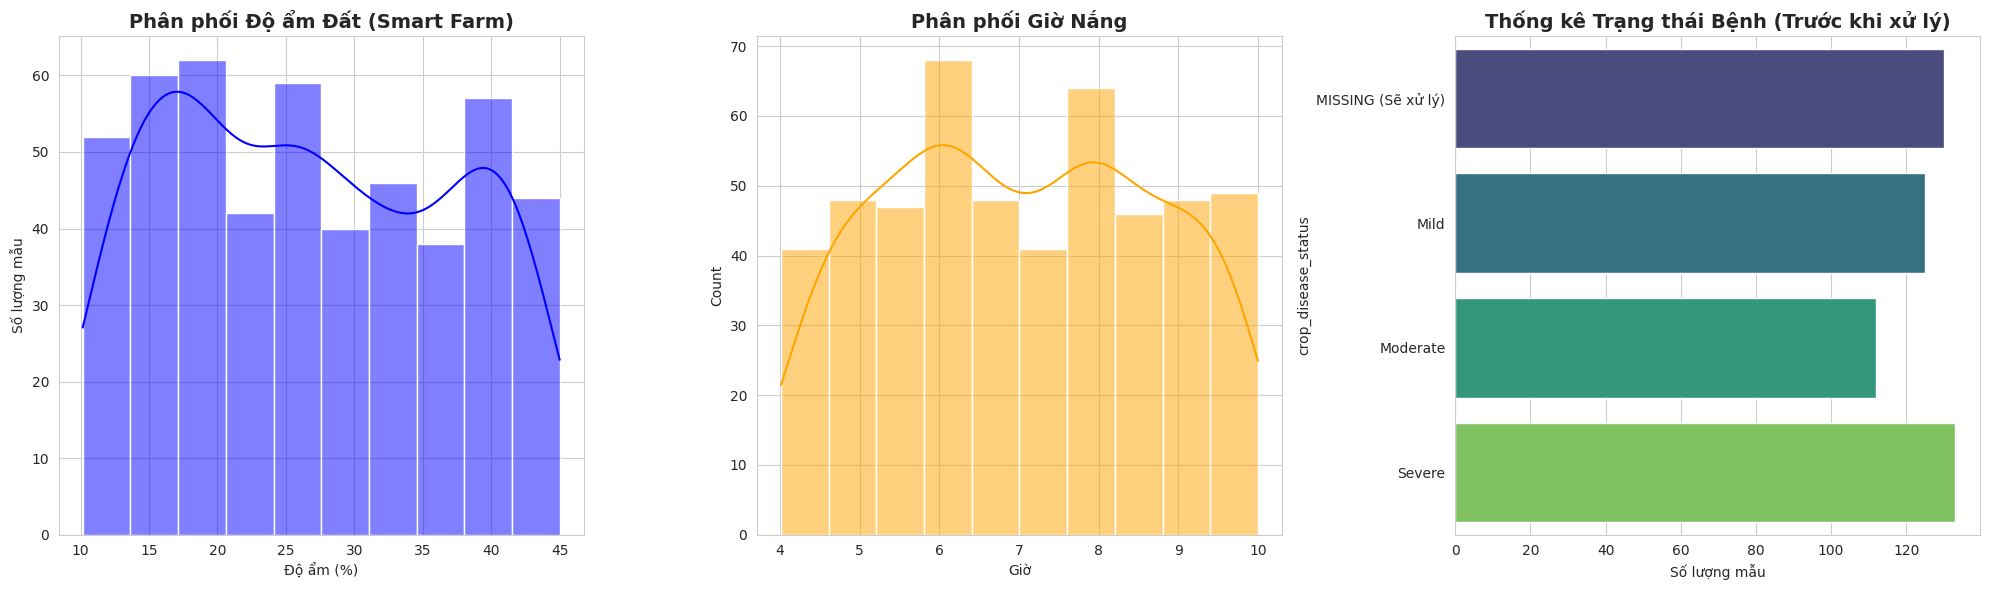

In [ ]:
# [CELL 4] - Visualize Dataset 2 (Smart Farming)
# Mục tiêu: Hiểu phân bố dữ liệu và nhìn rõ các giá trị bị thiếu

import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình kích thước biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Phân phối Độ ẩm đất
# Dải độ ẩm của bộ này khá rộng (đến 45%), rất tốt cho việc học "Đất ướt"
sns.histplot(df_farm['soil_moisture_%'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Phân phối Độ ẩm Đất (Smart Farm)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Độ ẩm (%)')
axes[0].set_ylabel('Số lượng mẫu')

# 2. Phân phối Giờ nắng
sns.histplot(df_farm['sunlight_hours'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('Phân phối Giờ Nắng', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Giờ')

# 3. Tỷ lệ Bệnh tật (Disease Status)
# Master Note: Tôi dùng .fillna('MISSING') tạm thời để bạn thấy rõ 130 dòng bị thiếu nó nhiều thế nào
temp_disease = df_farm['crop_disease_status'].fillna('MISSING (Sẽ xử lý)')
sns.countplot(y=temp_disease, palette='viridis', ax=axes[2], order=['MISSING (Sẽ xử lý)', 'Mild', 'Moderate', 'Severe'])
axes[2].set_title('Thống kê Trạng thái Bệnh (Trước khi xử lý)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Số lượng mẫu')

plt.tight_layout()
plt.show()

In [ ]:
# [CELL 5] - Process Dataset 2 (Smart Farming)
# Mục tiêu: Làm sạch, Chuẩn hóa tên cột và Xử lý dữ liệu thiếu

print("🛠️ Đang xử lý Dataset 2...")

# 1. Tạo bản sao để xử lý (tránh làm hỏng dữ liệu gốc)
df_farm_clean = df_farm.copy()

# 2. Đổi tên cột về chuẩn chung của dự án
# soil_moisture_% -> Soil_Moisture
# sunlight_hours -> Sunlight_Hours
# crop_disease_status -> Disease_Status_Original
df_farm_clean = df_farm_clean.rename(columns={
    'soil_moisture_%': 'Soil_Moisture',
    'sunlight_hours': 'Sunlight_Hours',
    'crop_disease_status': 'Disease_Status_Original'
})

# 3. Xử lý dữ liệu thiếu (Missing Values Imputation) - QUAN TRỌNG
# Chiến thuật: 130 dòng bị thiếu (NaN) chính là cây Khỏe (Healthy)
print(f"   -> Số lượng mẫu bị thiếu nhãn bệnh trước khi xử lý: {df_farm_clean['Disease_Status_Original'].isnull().sum()}")

# Lấp đầy NaN bằng 'Healthy'
df_farm_clean['Disease_Status_Original'] = df_farm_clean['Disease_Status_Original'].fillna('Healthy')

# 4. Tạo cột 'Disease_Flag' (Cờ báo bệnh)
# Logic:
# - Nếu là 'Healthy' hoặc 'None' -> Gán 'Healthy'
# - Nếu là 'Mild', 'Moderate', 'Severe' -> Gán 'Disease' (Có bệnh)

def standardize_disease_farm(status):
    # Chuyển về chuỗi ký tự để xử lý cho chắc chắn
    status_str = str(status).strip()

    if status_str in ['Healthy', 'None', 'nan']:
        return 'Healthy'
    else:
        return 'Disease'

df_farm_clean['Disease_Flag'] = df_farm_clean['Disease_Status_Original'].apply(standardize_disease_farm)

# 5. Chọn lọc cột cuối cùng và Đánh dấu nguồn
df_farm_final = df_farm_clean[['Soil_Moisture', 'Sunlight_Hours', 'Disease_Flag']].copy()
df_farm_final['Source'] = 'Smart_Farm_Dataset'

print("✅ Đã xử lý xong Dataset 2!")
print("-" * 30)
print("5 dòng dữ liệu sạch sau cùng:")
print(df_farm_final.head())
print("-" * 30)
print(f"Kích thước bộ dữ liệu sạch: {df_farm_final.shape}")
print(f"Thống kê nhãn bệnh:\n{df_farm_final['Disease_Flag'].value_counts()}")

🛠️ Đang xử lý Dataset 2...
   -> Số lượng mẫu bị thiếu nhãn bệnh trước khi xử lý: 130
✅ Đã xử lý xong Dataset 2!
------------------------------
5 dòng dữ liệu sạch sau cùng:
   Soil_Moisture  Sunlight_Hours Disease_Flag              Source
0          35.95            7.27      Disease  Smart_Farm_Dataset
1          19.74            5.67      Healthy  Smart_Farm_Dataset
2          29.32            8.23      Disease  Smart_Farm_Dataset
3          17.33            5.03      Healthy  Smart_Farm_Dataset
4          19.37            7.93      Disease  Smart_Farm_Dataset
------------------------------
Kích thước bộ dữ liệu sạch: (500, 4)
Thống kê nhãn bệnh:
Disease_Flag
Disease    370
Healthy    130
Name: count, dtype: int64


# XỬ LÝ BỘ DATASET 3

In [ ]:
# [CELL 6] - Inspect Dataset 3 (Crop Rec V2)
print("--- THÔNG TIN DATASET 3 (CROP V2) ---")
print(df_crop.info())

print("\n--- 5 DÒNG ĐẦU TIÊN ---")
display(df_crop.head())

# Kiểm tra thống kê của cột Pest Pressure (Áp lực sâu bệnh)
print("\n--- THỐNG KÊ PEST PRESSURE ---")
print(df_crop['pest_pressure'].describe())

--- THÔNG TIN DATASET 3 (CROP V2) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  ir

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671



--- THỐNG KÊ PEST PRESSURE ---
count    2200.000000
mean       49.850701
std        28.886354
min         0.038103
25%        24.379866
50%        49.982421
75%        74.681904
max        99.983849
Name: pest_pressure, dtype: float64


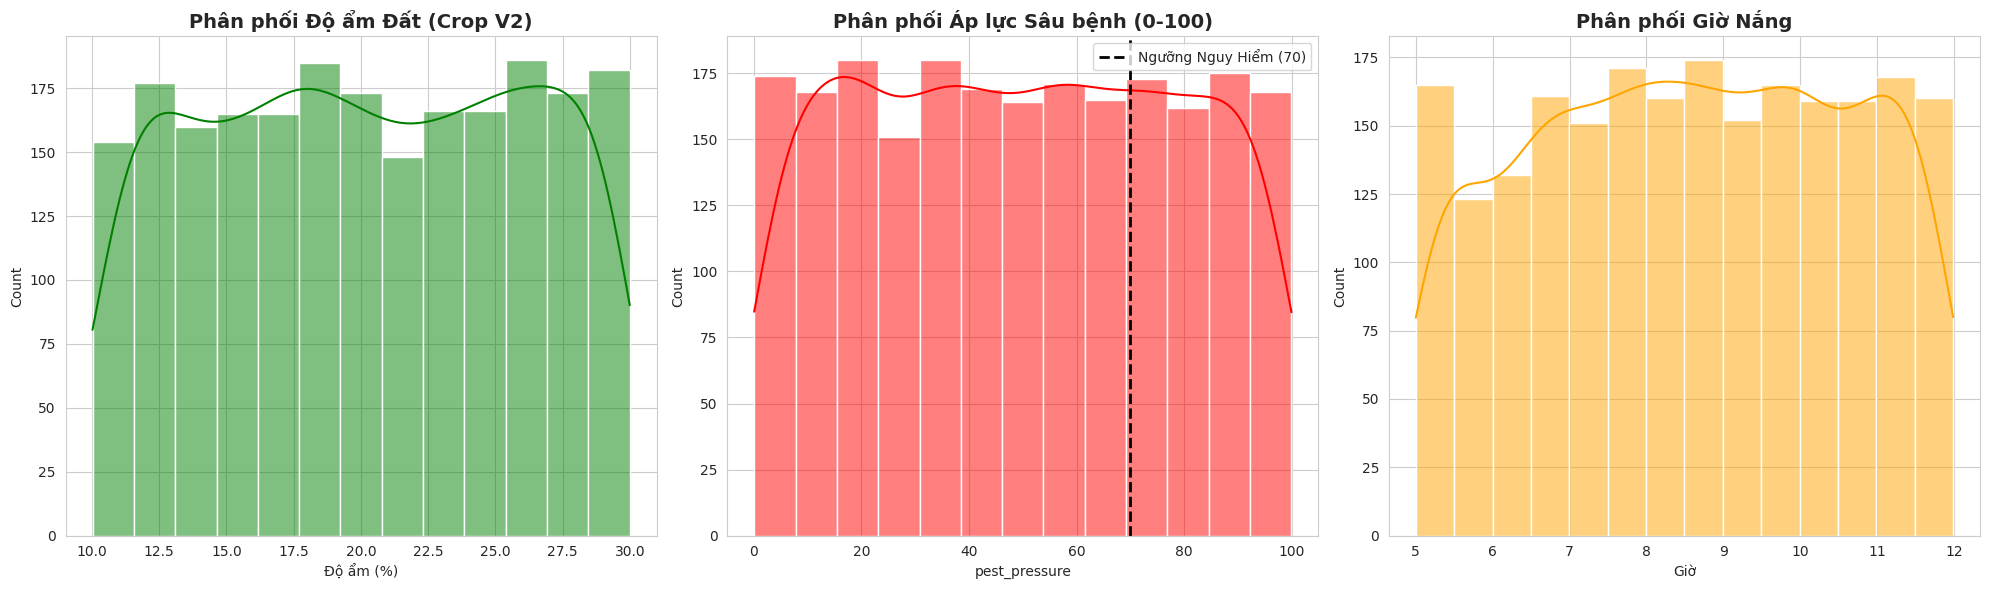

In [ ]:
# [CELL 7] - Visualize Dataset 3
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Phân phối Độ ẩm (Chú ý: Bộ này độ ẩm thường thấp < 30%)
sns.histplot(df_crop['soil_moisture'], kde=True, color='green', ax=axes[0])
axes[0].set_title('Phân phối Độ ẩm Đất (Crop V2)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Độ ẩm (%)')

# 2. Phân phối Áp lực Sâu bệnh (Pest Pressure)
sns.histplot(df_crop['pest_pressure'], kde=True, color='red', ax=axes[1])
axes[1].set_title('Phân phối Áp lực Sâu bệnh (0-100)', fontsize=14, fontweight='bold')
# Vẽ đường kẻ tại ngưỡng 70 để xem nó cắt dữ liệu thế nào
axes[1].axvline(x=70, color='black', linestyle='--', linewidth=2, label='Ngưỡng Nguy Hiểm (70)')
axes[1].legend()

# 3. Phân phối Giờ nắng
sns.histplot(df_crop['sunlight_exposure'], kde=True, color='orange', ax=axes[2])
axes[2].set_title('Phân phối Giờ Nắng', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Giờ')

plt.tight_layout()
plt.show()

In [ ]:
# [CELL 8] - Process Dataset 3
print("🛠️ Đang xử lý Dataset 3...")

df_crop_clean = df_crop.copy()

# 1. Đổi tên cột cho KHỚP với Dataset 2
# Điều này cực quan trọng để Notebook 4 có thể gộp 2 file lại
df_crop_clean = df_crop_clean.rename(columns={
    'soil_moisture': 'Soil_Moisture',
    'sunlight_exposure': 'Sunlight_Hours'
})

# 2. Logic tạo nhãn Bệnh từ Pest Pressure
# Ngưỡng 70: Nghĩa là cây chịu áp lực sâu bệnh thuộc nhóm cao nhất (Top Tier)
def create_disease_from_pest(pest_value):
    if pest_value >= 70:
        return 'Disease'  # Áp lực cao -> Gán bệnh
    else:
        return 'Healthy'  # Áp lực thấp/tb -> Gán khỏe

df_crop_clean['Disease_Flag'] = df_crop_clean['pest_pressure'].apply(create_disease_from_pest)

# 3. Chọn lọc cột & Đánh dấu nguồn
df_crop_final = df_crop_clean[['Soil_Moisture', 'Sunlight_Hours', 'Disease_Flag']].copy()
df_crop_final['Source'] = 'Crop_V2_Dataset'

print("✅ Đã xử lý xong Dataset 3!")
print("-" * 30)
print(df_crop_final.head())
print("-" * 30)
print(f"Kích thước bộ dữ liệu sạch: {df_crop_final.shape}")
print(f"Thống kê nhãn bệnh tự tạo:\n{df_crop_final['Disease_Flag'].value_counts()}")

🛠️ Đang xử lý Dataset 3...
✅ Đã xử lý xong Dataset 3!
------------------------------
   Soil_Moisture  Sunlight_Hours Disease_Flag           Source
0      29.446064        8.677355      Healthy  Crop_V2_Dataset
1      12.851183        5.754288      Disease  Crop_V2_Dataset
2      29.363913        9.875230      Healthy  Crop_V2_Dataset
3      26.207732        8.023685      Healthy  Crop_V2_Dataset
4      28.236236        8.120512      Healthy  Crop_V2_Dataset
------------------------------
Kích thước bộ dữ liệu sạch: (2200, 4)
Thống kê nhãn bệnh tự tạo:
Disease_Flag
Healthy    1538
Disease     662
Name: count, dtype: int64


In [ ]:
# [CELL 9] - Save Checkpoints (Lưu kết quả)
output_path_2 = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/processed_data_2+3/processed_smart_farm.csv"
output_path_3 = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/processed_data_2+3/processed_crop_v2.csv"

# Lưu file
df_farm_final.to_csv(output_path_2, index=False)
df_crop_final.to_csv(output_path_3, index=False)

print("💾 ĐÃ LƯU 2 FILE DỮ LIỆU SẠCH THÀNH CÔNG:")
print(f"   1. {output_path_2} (Từ bộ Smart Farm)")
print(f"   2. {output_path_3} (Từ bộ Crop V2)")
print("\n🎉 CHÚC MỪNG! BẠN ĐÃ HOÀN THÀNH NOTEBOOK 3.")
print("👉 Hãy tải 2 file này về máy (hoặc để trên Drive) để dùng cho Notebook 4.")

💾 ĐÃ LƯU 2 FILE DỮ LIỆU SẠCH THÀNH CÔNG:
   1. /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/processed_data_2+3/processed_smart_farm.csv (Từ bộ Smart Farm)
   2. /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/processed_data_2+3/processed_crop_v2.csv (Từ bộ Crop V2)

🎉 CHÚC MỪNG! BẠN ĐÃ HOÀN THÀNH NOTEBOOK 3.
👉 Hãy tải 2 file này về máy (hoặc để trên Drive) để dùng cho Notebook 4.
